In [1]:
library("deSolve")
library("ggplot2")

Warning message:
"package 'deSolve' was built under R version 3.6.2"Warning message:
"package 'ggplot2' was built under R version 3.6.2"

In [2]:
K_g = 1 # 0.7-1.2 confirmed
H_g = 250 # 1 was confirmed, but it was shit

K_gL = K_g/10
H_gL = H_g

e = 5e-7 # confirmed
K_d = 0.01
H_d = H_g

K_a = 2e-7#2e-7 #2e-7 is confirmed
K_pd = 0#1e-9 #random number

B = 50 #confirmed
r = 1e-3
d = 0.00

K_arb = 100
K_da = 1e-3

In [3]:
# functions for ODE solving here

monod <- function(S, Ks){ # since it gets called a lot 
  return (S/(Ks+S))
}


f <- function(t, y, params){ # Main ODE system
  G = y[1]
  R = y[2]
  P = y[3]
  L = y[4]
  A = y[5]

  i = params[1]

  N = K_g*G*monod(R,H_g)  
  NL = K_gL*L*monod(R,H_gL) 
  
  P_lys = 0.9*A/(1e+5+A)+0.1

  N_lys = P_lys*K_a*P*G
  N_lyt = (1-P_lys)*K_a*P*G
  
  dGdt = N - K_d*G*(1-monod(R, H_g)) - K_a*P*G - d*G #new bacterial growth - deaths - new phage binds
  dLdt = NL - K_d*L*(1-monod(R, H_g)) + N_lys - r*L - d*L #new lysogen growth + new lysogens - deaths - inductions  #- K_d*L*(1-monod(R, H_g))
  dPdt =  B*N_lyt + B*r*L - K_a*P*(G+L) - K_pd*P -d*P# lyses + inductions - new binds - phage deaths (supposed to be G+L)
    
  dRdt = -e*(N+NL) + i -d*R#depleted by new growth, add exogenous
    
  dAdt = N_lys*K_arb -K_da *A - d*A
  temp <- c(dGdt, dRdt, dPdt, dLdt, dAdt)
  L = list(temp)
  
  return(list(temp))
}


In [4]:
# Playing with the model here. 
out = data.frame()

# Let the population grow to its normal equilibrium size
times <- seq(0,to=400,by=0.1)
initials <- c(G=1, R=100, P=1, L = 0, A=0)
out_1 <- as.data.frame(ode(func=f,y=initials,parms = c(i=10),times=times))
out <- rbind(out, out_1)

In [84]:
# Give the population some new resources
Q = length(out$time)
times <- seq(out$time[Q],to=out$time[Q]+400,by=1)
initials <- c(G=out$G[Q], R=out$R[Q], P = out$P[Q], L=out$L[Q], A = out$A[Q])
out_1 <- as.data.frame(ode(func=f,y=initials,parms = c(i=10),times=times))
out <- rbind(out, out_1)

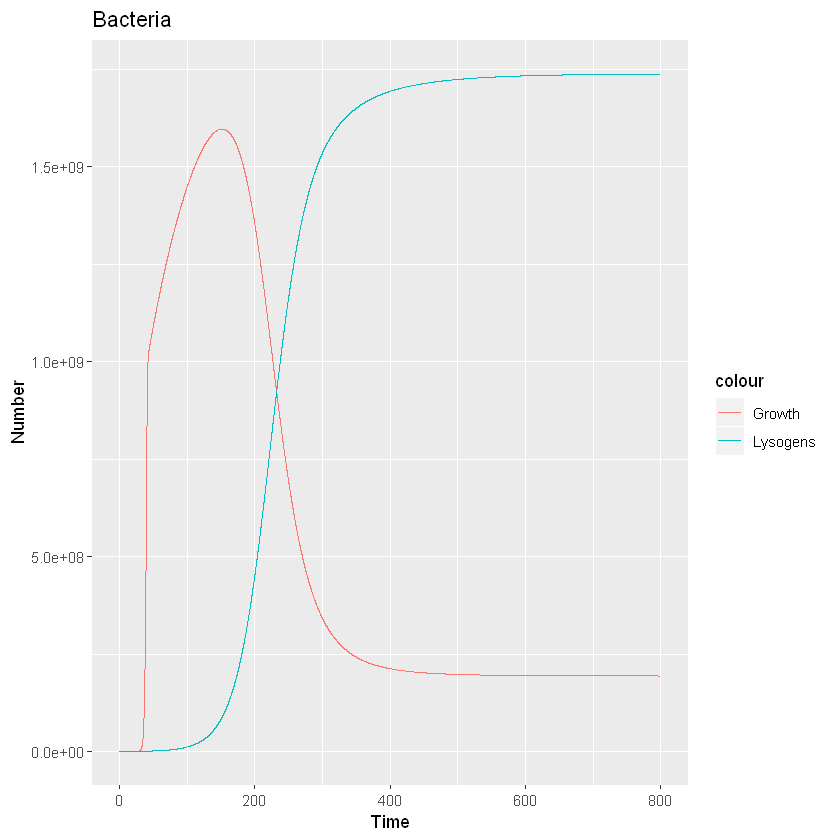

In [85]:
ggplot(out, aes(time))+geom_line(aes(y=G, color='Growth')) +geom_line(aes(y=L, color='Lysogens'))  + labs(title='Bacteria', x='Time', y='Number') 

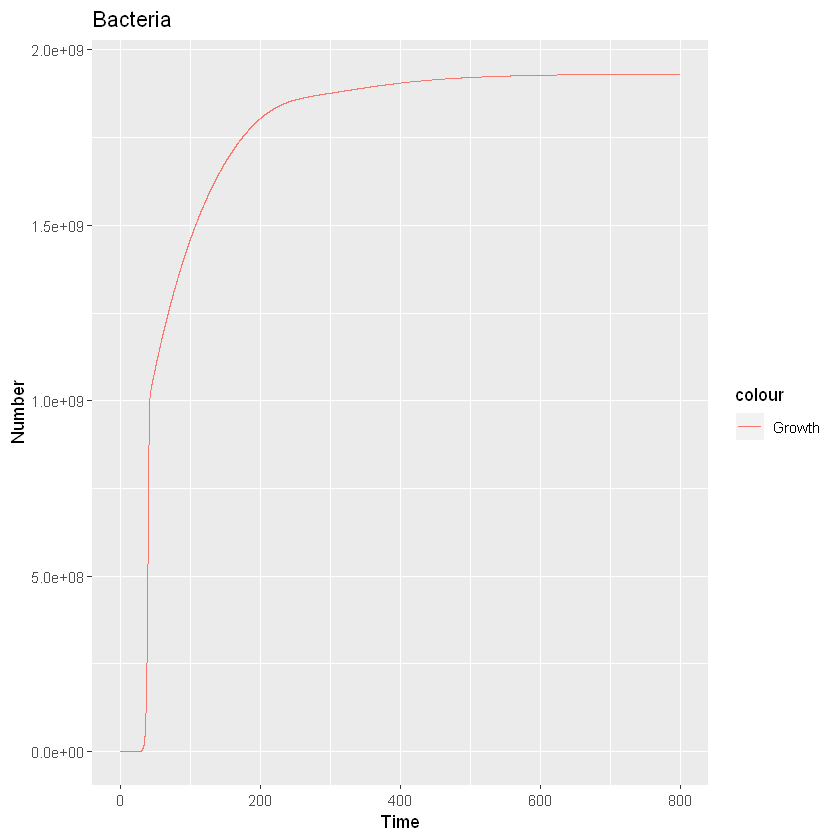

In [90]:
ggplot(out, aes(time))+geom_line(aes(y=G+L, color='Growth'))   + labs(title='Bacteria', x='Time', y='Number') 

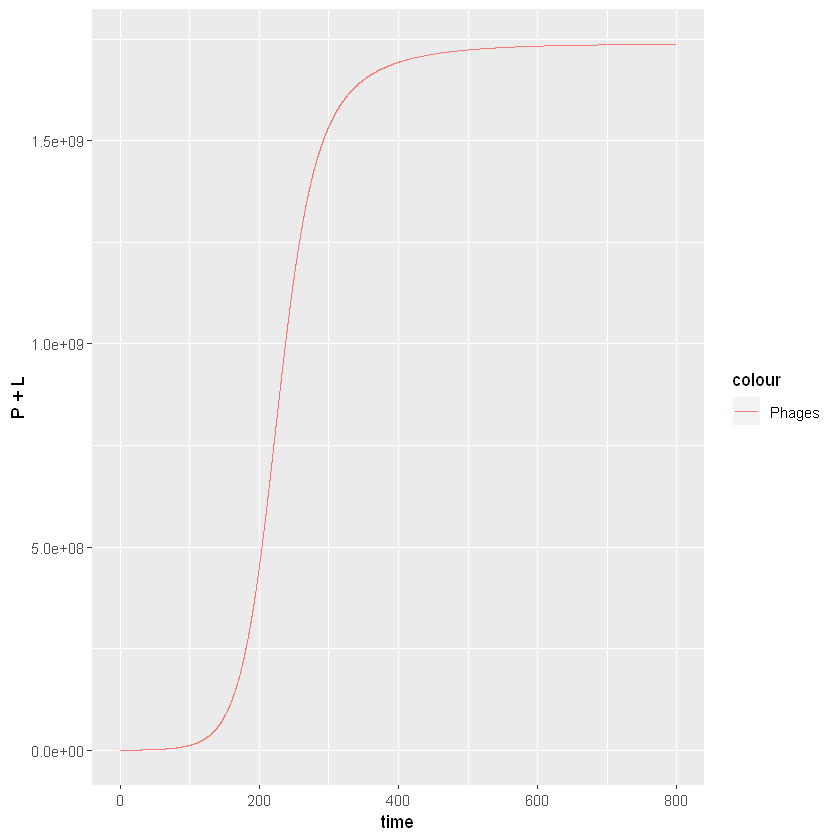

In [88]:
ggplot(out, aes(time))+geom_line(aes(y=P+L,color='Phages'))

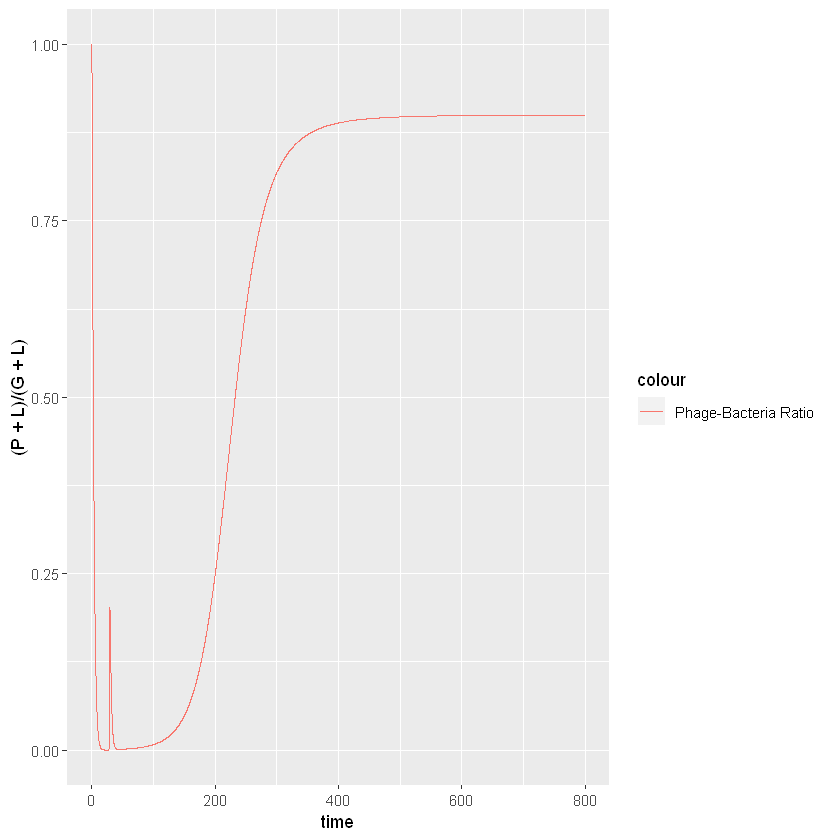

In [89]:
ggplot(out, aes(time))+geom_line(aes(y=(P+L)/(G+L),color='Phage-Bacteria Ratio'))

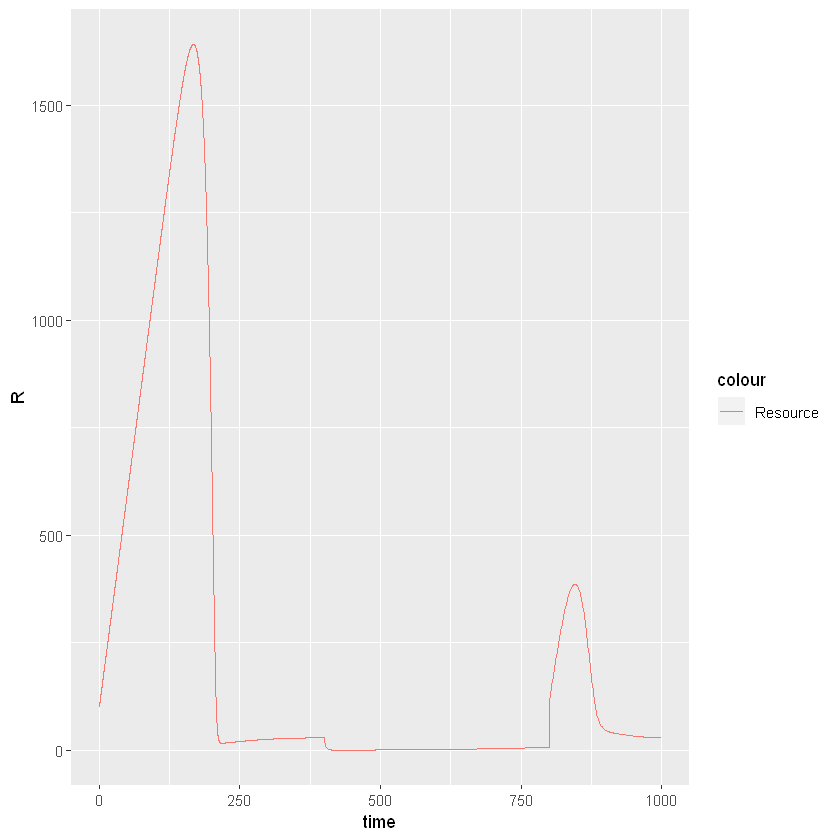

In [10]:
ggplot(out, aes(time))+geom_line(aes(y=R,color='Resource'))